# Dealing with unclean data

In [1]:
#import the libraries
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
#create the spark session
spark_session = SparkSession\
        .builder\
        .master("local[4]")\
        .getOrCreate()

logger = spark_session._jvm.org.apache.log4j
logger.LogManager.getLogger("org").setLevel(logger.Level.WARN)

In [3]:
#Load the CSV into dataframe
df = spark_session \
        .read \
        .options(header='true', inferschema='true') \
        .option("delimiter", ",") \
        .csv("/home/master/Descargas/bridge.csv") \
        .persist()

In [4]:
df.show() 

+-------------------+--------------------+
|             Weight|         Deformation|
+-------------------+--------------------+
| 0.1600004095193499|  0.599999565925713 |
| 0.7999996334783612|  0.105573019041743 |
| 0.3474026835213373|0.41059125458931517 |
| 0.3409188533102768| 0.4161174319177898 |
|0.33448446398543363| 0.4216536843155324 |
|   0.35390522300019| 0.4051006617019322 |
| 0.3280925245214544|0.42720638686411727 |
| 0.3217358217215534|0.43278238841939665 |
|0.36039794488768706| 0.3996684723945372 |
| 0.3154172733712044|  0.4383797783455403|
| 0.3669234753668437| 0.3942579191642874 |
|0.37345638999357544| 0.3888892255982278 |
| 0.3091488764126171|0.44398842406579203 |
| 0.3800121516706126|0.38354874656944227 |
|0.30295098086750766|0.44959017652156535 |
| 0.2967605824612727|                null|
|0.38657333470529276|  0.3782497818184258|
|0.29063517731969263| 0.4608941011769619 |
|0.28454896813201636|0.46656868557912423 |
|0.39313313091886176|  0.3729967066807797|
+----------

In [5]:
#Filter nulls and characters
df = df.where(~(F.col("Weight").isNull() | F.col("Deformation").isNull()))
df = df.where(~(F.col("Weight").rlike(r"[a-z]") | F.col("Deformation").rlike(r"[a-z]")))

In [6]:
#Drop duplicates and sort by weight
df.dropDuplicates()
df = df.sort(df.Weight.asc())

In [7]:
df.show(200)

+-------------------+--------------------+
|             Weight|         Deformation|
+-------------------+--------------------+
| 0.1600004095193499|  0.599999565925713 |
| 0.1648329040548488|  0.594003820900443 |
|0.16970904653473867| 0.5880424375330787 |
|0.17463981673699797| 0.5821007122673473 |
|0.17962395438061485| 0.5761793387233021 |
|0.18464464597065045|  0.570297033130658 |
|0.18971116938088003| 0.5644415504920198 |
|0.19483040279337605| 0.5586040346168714 |
| 0.2000371859206756|  0.5527448336277041|
|  0.205263704212623| 0.5469396381600565 |
| 0.2105619652240353| 0.5411296943302976 |
| 0.2159151711218809| 0.5353332698035185 |
| 0.2213177326158328|   0.52955584408585 |
| 0.2267632101907031| 0.5238034112067054 |
|0.23229484801346945| 0.5180302417933517 |
| 0.2435380605977785|  0.506504259978834 |
|0.24925016280479606|  0.5007504192441555|
| 0.2549991070353236| 0.4950256529782197 |
| 0.2549991070353236| 0.4950256529782197 |
| 0.2607841547754233|0.48932970052841396 |
| 0.2666410

In [8]:
#Change type to float and plot
df = df.withColumn("Weight", F.col("Weight").cast("double"))
df = df.withColumn("Deformation", F.col("Deformation").cast("double"))
df.printSchema()

root
 |-- Weight: double (nullable = true)
 |-- Deformation: double (nullable = true)



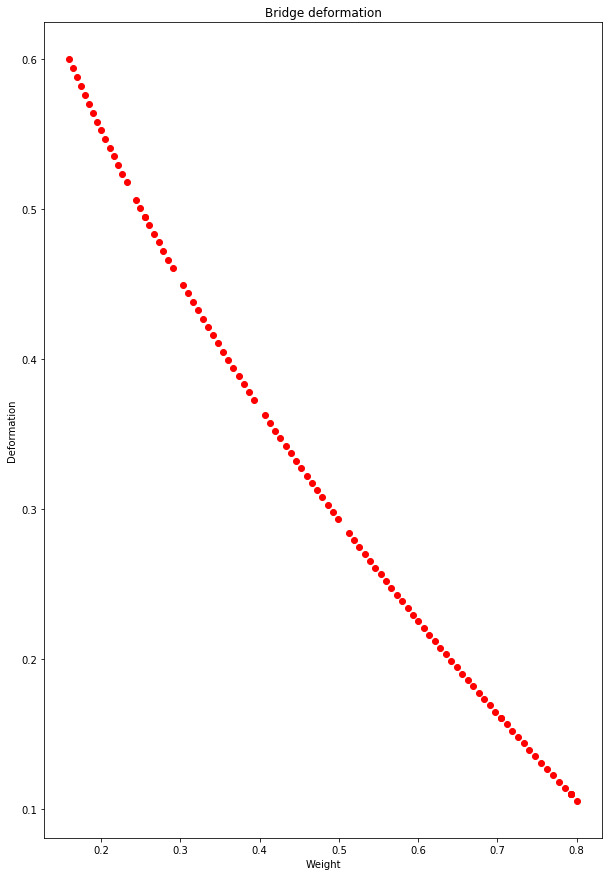

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,15))
plt.plot(df.select("Weight").collect(), df.select("Deformation").collect(),'ro')
plt.xlabel("Weight")
plt.ylabel("Deformation")
plt.title("Bridge deformation")
plt.show()